In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
%matplotlib inline

In [2]:
%ls

 Volume in drive C is OS
 Volume Serial Number is 048E-4485

 Directory of C:\Users\Imtiaz\Downloads\Data_science_folder\black_friday_sales

11/07/2022  09:38 PM    <DIR>          .
10/07/2022  06:35 AM    <DIR>          ..
06/07/2022  06:54 PM    <DIR>          .ipynb_checkpoints
11/07/2022  09:38 PM           192,479 black_market_sales.ipynb
26/09/2019  02:28 PM         9,598,228 test.csv
26/09/2019  02:28 PM        25,525,678 train.csv
               3 File(s)     35,316,385 bytes
               3 Dir(s)  714,405,138,432 bytes free


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
df = pd.concat([train, test], axis=0).reset_index()
df.drop(columns=["index"],inplace=True)

In [5]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [7]:
train.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [8]:
def check_null(cols, df):
    for i in cols:
        print(f"{i} : {df[i].isnull().any(axis=0)} ->total : {df[i].isnull().sum()}")

In [9]:
check_null([*train.columns],train)

User_ID : False ->total : 0
Product_ID : False ->total : 0
Gender : False ->total : 0
Age : False ->total : 0
Occupation : False ->total : 0
City_Category : False ->total : 0
Stay_In_Current_City_Years : False ->total : 0
Marital_Status : False ->total : 0
Product_Category_1 : False ->total : 0
Product_Category_2 : True ->total : 173638
Product_Category_3 : True ->total : 383247
Purchase : False ->total : 0


In [10]:
def average_age(data):
    container = []
    for i in data:
        found_0 = False
        total = 0
        run = 0
        d = re.findall(re.compile("\d+"), i)
        for num in d:
            j = int(num)
            if j == 0:
                found_0 = True
            total += j
            run += 1
        if run == 1:
            container.append(int(total))
        else:
            if found_0 == True:
                container.append(int(total))
            else:
                container.append(float(total/2))
    return container

In [11]:
def ranomly_pick(data):
    container = []
    for i in data:
        data = re.findall(re.compile("\d+"), i)
        if len(data) > 1:
            if int(data[0]) != 0:
                rang = round(np.random.choice(np.linspace(int(data[0]),int(data[1]),4)))
                container.append(int(rang))
            else:
                container.append(int(data[1]))
        else:
            container.append(int(data[0]))
    return container

In [12]:
def age_grouping(data):
    container = []
    for val in data:
        i = val
        if i > 0 and i<=12:
            container.append("Child")
        elif i >=13 and i <=18:
            container.append("Adolescence")
        elif i >= 19 and i < 55:
            container.append("Adult")
        else:
            container.append("Senior_Adult")
    return container

In [13]:
con = np.array(ranomly_pick(train.loc[:,"Age"]))
train.insert(loc=5, column="MeanAge", value=con)

In [14]:
ageGP = np.array(age_grouping(train.loc[:,"MeanAge"]))
train.insert(loc=4, column="AgeGroup", value=ageGP)

## Data Analysis

{'whiskers': [<matplotlib.lines.Line2D at 0x1b48797a0d0>,
 'caps': [<matplotlib.lines.Line2D at 0x1b48797a730>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b48795fdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b48797ac10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b48797aee0>],
 'means': []}

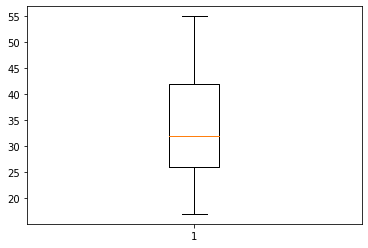

In [15]:
plt.boxplot(train["MeanAge"])

In [16]:
q1 = np.quantile(train["MeanAge"], q=.25)
q2 = np.quantile(train["MeanAge"], q=.50)
q3 = np.quantile(train["MeanAge"], q= .75)
hob = np.quantile(train["MeanAge"], q= 1)
lob = np.quantile(train["MeanAge"], q= 0)
print("1st Q:{}\n2nd Q:{}\n3rd Q:{}\nhigher outer bound:{}\nlower outer bound:{}".format(q1,q2,q3,hob,lob))

1st Q:26.0
2nd Q:32.0
3rd Q:42.0
higher outer bound:55
lower outer bound:17


From the boxplot observation, we found that 25% pepole are below 30 year and 75% people are over 30.5 year, 50% pepole are below 30.5 year and 50% people are over 30.5 year and 75% pepole are below 40.5 year and 25% people are over 40.5 year.

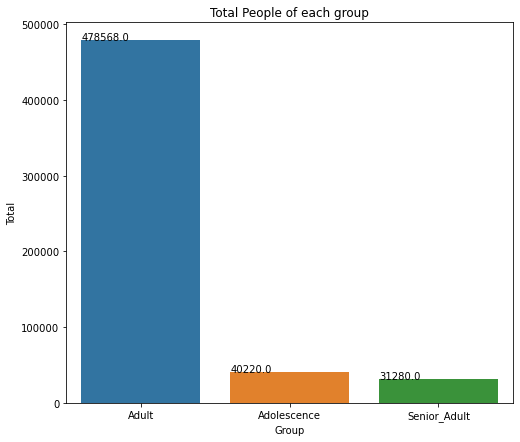

In [17]:
plt.figure(figsize=(8,7))
index = train["AgeGroup"].value_counts().index
values = train["AgeGroup"].value_counts().values
age_group = pd.DataFrame({"Group":index,"Total":values},index=[0,1,2])
ag = sns.barplot(x="Group",y="Total", data=age_group)
for p in ag.patches:
    ag.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Total People of each group")
plt.show()

Q2 : What is the mean of each gender, total people of each gender with age group. 

<AxesSubplot:xlabel='Gender', ylabel='MeanAge'>

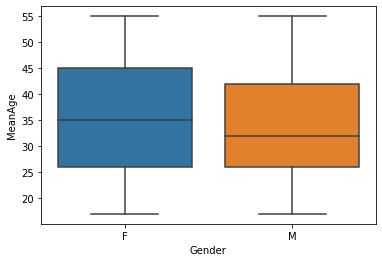

In [18]:
sns.boxplot(x="Gender",y="MeanAge",data=train)

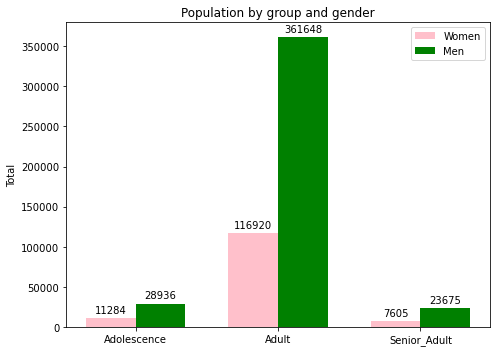

In [19]:
agWgender = train.groupby(["AgeGroup","Gender"])["Gender"]
data = agWgender.count().unstack()
cols = [*data.columns]
indx = [*data['M'].index]
values = {}
for i in cols:
    values[i] = [*data[i].values]
x = np.arange(len(indx))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, values['F'], width, label='Women', color="pink")
rects2 = ax.bar(x + width/2, values['M'], width, label='Men', color="green")
ax.set_ylabel('Total')
ax.set_title('Population by group and gender')
ax.set_xticks(x, indx)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

From the observation, found that Adult group has the most male population and observation indicates that female purchase less on black-friday compared to male.

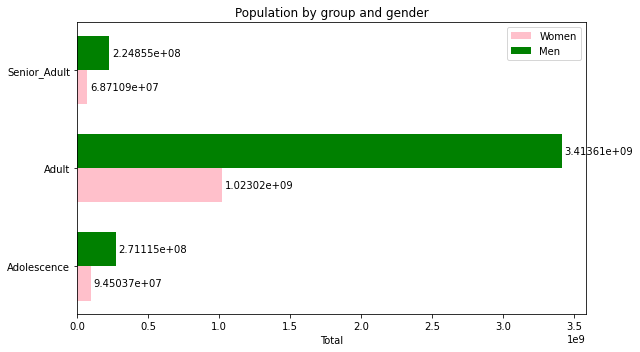

In [20]:
gPurchase = train.groupby(["AgeGroup","Gender"])["Purchase"]
data = gPurchase.sum().unstack()
cols = [*data.columns]
indx = [*data['M'].index]
values = {}
for i in cols:
    values[i] = [*data[i].values]
x = np.arange(len(indx))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.barh(x - width/2, values['F'], width, label='Women', color="pink")
rects2 = ax.barh(x + width/2, values['M'], width, label='Men', color="green")
ax.set_xlabel('Total')
ax.set_title('Population by group and gender')
ax.set_yticks(x, indx)
ax.legend()
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
fig.tight_layout()
plt.show()

From the observation, we can see that Adult group purchased more than other groups and male purchased more than female on black friday. 

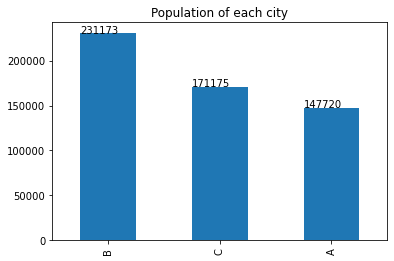

In [21]:
# population of each city
city = train["City_Category"].value_counts().plot(kind="bar")
for p in city.patches:
    city.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Population of each city")
plt.show()

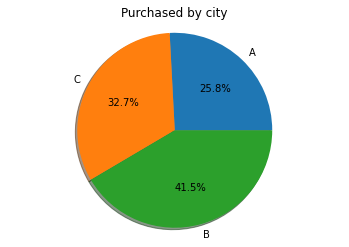

In [22]:
# purchased by city
cities = {}
total_city = [*train["City_Category"].unique()]
for i in total_city:
    city = np.sort(np.array([*train[train["City_Category"] == i]["Purchase"].values]))
    cities[i] = city
plt.pie([cities["A"].sum(), cities["C"].sum(), cities["B"].sum()], labels=[*cities.keys()], 
        autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title("Purchased by city")
plt.show()

In [23]:
from sklearn.preprocessing import normalize
range(round(cities['A'].mean()))

range(0, 8912)

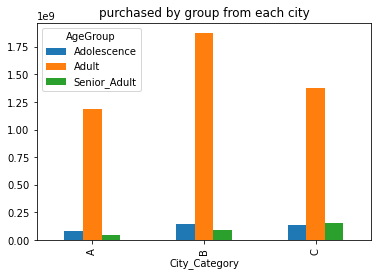

In [24]:
# purchased by group from each city
pgc = train.groupby(["City_Category","AgeGroup"])["Purchase"].sum().unstack()
pgc.plot(kind="bar")
plt.title("purchased by group from each city")
plt.show()

From the observation, we can see city "B" has the highest population and "B" has most purchases, and adult group purchased most in city "B" followed by city "C"

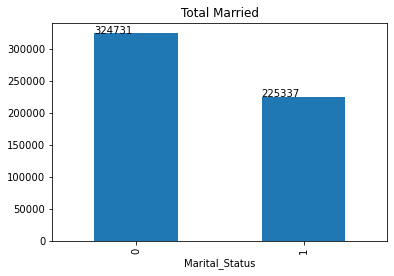

In [25]:
mp = train.groupby("Marital_Status")["Marital_Status"]
tmp = mp.count().plot(kind="bar")
for p in tmp.patches:
    tmp.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Total Married")
plt.show()

From the observation, we can see that there is less married people (324731) compared to married people.

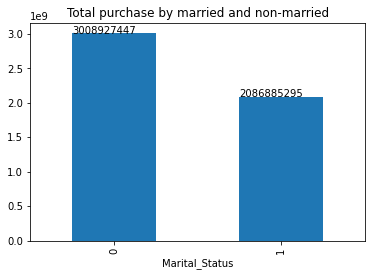

In [26]:
mpPur = train.groupby("Marital_Status")["Purchase"].sum()
tmpPur = mpPur.plot(kind="bar")
for p in tmpPur.patches:
    tmpPur.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Total purchase by married and non-married")
plt.show()

From the observation, we can see that non-married people bought more than married people on black-friday.

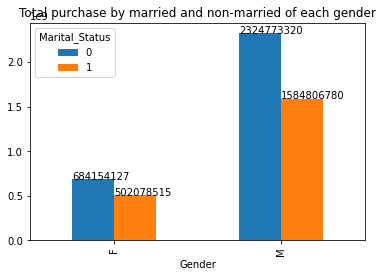

In [27]:
pbeg = train.groupby(["Gender","Marital_Status"])
tpbeg = pbeg["Purchase"].sum().unstack().plot(kind="bar")
for p in tpbeg.patches:
    tpbeg.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Total purchase by married and non-married of each gender")
plt.show()

From the observation, we can see that non-married males purchased most and non-married females purchased most, so we can tell that on black-friday non-married people purchased most.

In [254]:
def get_value(data, df):
    val = {}
    for i in data:
        temp = df[i]
        if temp.isnull().any(axis=0):
            temp = temp.dropna()
            val[i] = temp.sum()
        else:
            pass
            val[i] = temp.sum()
    return val

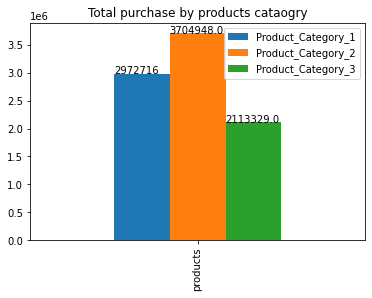

In [258]:
# which product catagory are purchased most
col = ["Product_Category_1", "Product_Category_2", "Product_Category_3"]
val = pd.DataFrame(get_value(col, train),index=["products"])
product_val = val.plot(kind="bar")
for p in product_val.patches:
    product_val.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))
plt.title("Total purchase by products cataogry")
plt.show()

In [260]:
# product catagory are purchased most by which gender, AgeGroup, City_Category
pcpmbg = train[col].replace(np.nan,0)
pcpmbg

,Product_Category_1,Product_Category_2,Product_Category_3
0,3,0.0,0.0
1,1,6.0,14.0
2,12,0.0,0.0
3,12,14.0,0.0
4,8,0.0,0.0
...,...,...,...
550063,20,0.0,0.0
550064,20,0.0,0.0
550065,20,0.0,0.0
550066,20,0.0,0.0


#### Inferential

In [261]:
train

,User_ID,Product_ID,Gender,Age,AgeGroup,Occupation,MeanAge,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,Adolescence,10,17,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,Adolescence,10,17,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,Adolescence,10,17,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,Adolescence,10,17,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,Senior_Adult,16,55,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,Adult,13,52,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,Adult,1,35,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,Adult,15,32,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,Senior_Adult,1,55,C,2,0,20,NaN,NaN,365


#### Casual

## ML Model

## Data Mining